In [1]:
# Importing modules

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import svm

sns.set()

In [2]:
# importing data

data = pd.read_csv('../data/labeled_data.csv')
dataTrain, dataTest = train_test_split(data, train_size=0.8)

In [3]:
dataTrain

,Nervousness_Label,Unable to control_Label,Worry_Label,Trouble in Relaxation_Label,Restlessness_Label,Irritability_Label,Fear_Label,Stress_Label
8327,3,3,2,1,1,0,2,2
3459,2,0,1,2,3,1,2,2
11469,3,1,3,0,2,2,0,2
2835,1,0,1,3,3,2,1,2
13176,2,1,3,1,3,3,1,2
...,...,...,...,...,...,...,...,...
6452,1,1,1,0,1,2,3,1
11031,2,0,3,1,2,3,0,2
10242,0,3,2,0,0,1,0,1
2529,2,3,2,3,1,3,0,2


In [4]:
dataTest

,Nervousness_Label,Unable to control_Label,Worry_Label,Trouble in Relaxation_Label,Restlessness_Label,Irritability_Label,Fear_Label,Stress_Label
14227,3,1,2,2,3,2,1,2
12174,2,1,1,2,1,3,3,2
5498,0,1,3,3,0,3,3,2
11357,1,2,3,2,3,0,2,2
8265,3,1,2,0,0,3,1,1
...,...,...,...,...,...,...,...,...
14590,1,2,1,3,1,1,3,2
7755,0,2,1,1,1,1,0,1
11427,0,0,1,3,1,3,3,2
7885,3,3,0,2,3,1,1,2


## Function to score each model

In [5]:
def scoreModel(clf):
    return clf.score(dataTest.drop(['Stress_Label'], axis=1), dataTest['Stress_Label'])

## Using SVM Linear

SVM Linear is the fastest SVM model but may have the lowest level of accuracy.

In [6]:
clf = make_pipeline(StandardScaler(), svm.LinearSVC(random_state=0, tol=1e-5))
clf.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(random_state=0, tol=1e-05))])

In [7]:
scoreModel(clf)

0.9646017699115044

## Training other models

These models take longer to train as they have a higher time complexity.

In [8]:
### SVM Training Constant

C = 1.0

In [9]:
# SVM Linear Kernel

clfLIN = make_pipeline(StandardScaler(), svm.SVC(kernel="linear", C=C))
clfLIN.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

clfRBF = make_pipeline(StandardScaler(), svm.SVC(kernel="rbf", gamma='auto', C=C))
clfRBF.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

clfPOLY = make_pipeline(StandardScaler(), svm.SVC(kernel="poly", degree=4, gamma='auto', C=C))
clfPOLY.fit(dataTrain.drop(['Stress_Label'], axis=1), dataTrain['Stress_Label'])

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(degree=4, gamma='auto', kernel='poly'))])

In [13]:
### Determining Score for SVM models

scores = {
    'linear': scoreModel(clf),
    'clfLIN': scoreModel(clfLIN),
    'clfRBF': scoreModel(clfRBF),
    'clfPOLY': scoreModel(clfPOLY),
}

for name, val in scores.items():
    print(f"{name}: {val}")

linear: 0.9646017699115044
clfLIN: 1.0
clfRBF: 1.0
clfPOLY: 0.44064693317058284


<AxesSubplot:>

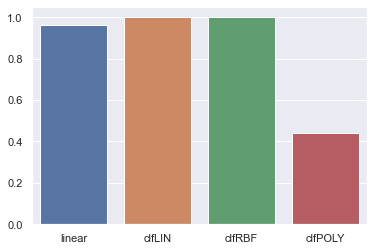

In [32]:
### plotting graph accuracy

keys = list(scores.keys())
vals = [float(scores[k]) for k in keys]
sns.barplot(x=keys, y=vals)

In [12]:
### Exporting clfLIN and clfRGF
#https://scikit-learn.org/stable/modules/model_persistence.html

from joblib import dump, load

dump(clfLIN, './classificationModels/clfLIN.joblib')
dump(clfRBF, './classificationModels/clfRBF.joblib')

['./classificationModels/clfRBF.joblib']